In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Import

In [2]:
data = pd.read_csv('../data/dax_indicator_2000_2024.csv')
data.head()

,Date,volume,direction_num,direction,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,2010-02-19,121594600,94.790039,1,5640.290039,5567.522949,5568.541469,5639.855728,5595.033937,5600.607976,...,0,0,1,1,0,0,1,0,0,1
1,2010-02-22,94749200,-52.560059,0,5683.599935,5594.048619,5573.367885,5680.952766,5626.787904,5616.800220,...,0,0,0,1,0,0,1,0,0,1
2,2010-02-23,138143800,-111.560059,0,5696.966634,5620.407157,5571.852155,5684.696354,5642.200913,5626.352182,...,0,0,0,1,0,0,1,0,0,1
3,2010-02-24,130761600,-6.800293,0,5671.519857,5635.218541,5566.993583,5644.383089,5632.668141,5623.381201,...,1,0,1,1,0,1,1,0,0,1
4,2010-02-25,150089500,-30.370117,0,5636.006510,5650.134208,5572.869978,5629.946427,5628.378547,5622.331677,...,1,0,1,1,0,1,1,0,1,1


In [3]:
data.drop('Date', axis=1, inplace=True)
data.head()

,volume,direction_num,direction,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,121594600,94.790039,1,5640.290039,5567.522949,5568.541469,5639.855728,5595.033937,5600.607976,-100.308660,...,0,0,1,1,0,0,1,0,0,1
1,94749200,-52.560059,0,5683.599935,5594.048619,5573.367885,5680.952766,5626.787904,5616.800220,-82.558273,...,0,0,0,1,0,0,1,0,0,1
2,138143800,-111.560059,0,5696.966634,5620.407157,5571.852155,5684.696354,5642.200913,5626.352182,-70.391568,...,0,0,0,1,0,0,1,0,0,1
3,130761600,-6.800293,0,5671.519857,5635.218541,5566.993583,5644.383089,5632.668141,5623.381201,-66.787446,...,1,0,1,1,0,1,1,0,0,1
4,150089500,-30.370117,0,5636.006510,5650.134208,5572.869978,5629.946427,5628.378547,5622.331677,-62.290006,...,1,0,1,1,0,1,1,0,1,1


# X y validation Split

In [4]:
y = data[['direction']]
X = data.drop(['direction','direction_num'],axis=1) #

In [5]:
X.head()

,volume,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,121594600,5640.290039,5567.522949,5568.541469,5639.855728,5595.033937,5600.607976,-100.308660,47.170898,-147.479558,...,0,0,1,1,0,0,1,0,0,1
1,94749200,5683.599935,5594.048619,5573.367885,5680.952766,5626.787904,5616.800220,-82.558273,51.937028,-134.495301,...,0,0,0,1,0,0,1,0,0,1
2,138143800,5696.966634,5620.407157,5571.852155,5684.696354,5642.200913,5626.352182,-70.391568,51.282986,-121.674554,...,0,0,0,1,0,0,1,0,0,1
3,130761600,5671.519857,5635.218541,5566.993583,5644.383089,5632.668141,5623.381201,-66.787446,43.909686,-110.697133,...,1,0,1,1,0,1,1,0,0,1
4,150089500,5636.006510,5650.134208,5572.869978,5629.946427,5628.378547,5622.331677,-62.290006,38.725701,-101.015707,...,1,0,1,1,0,1,1,0,1,1


#### Imput the list of position columns

In [6]:
cat_col_names = pd.read_csv('../data/temp_cat_col_names.csv')
cat_col_names.drop('Unnamed: 0', axis=1, inplace=True)
cat_col_names = cat_col_names['0'].tolist()
cat_col_names

['pos_sma_3',
 'pos_sma_7',
 'pos_sma_14',
 'pos_ema_3',
 'pos_ema_7',
 'pos_ema_14',
 'pos_BBL_3_2.0',
 'pos_BBM_3_2.0',
 'pos_BBU_3_2.0',
 'pos_BBL_7_2.0',
 'pos_BBM_7_2.0',
 'pos_BBU_7_2.0',
 'pos_BBL_14_2.0',
 'pos_BBM_14_2.0',
 'pos_BBU_14_2.0']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=99, shuffle=False)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)

In [9]:
X_train_num = X_train.select_dtypes(np.number)
X_train_num.drop(cat_col_names, axis=1, inplace=True)
X_train_cat = X_train[cat_col_names]


X_test_num = X_test.select_dtypes(np.number)
X_test_num.drop(cat_col_names, axis=1, inplace=True)
X_test_cat = X_test[cat_col_names]


X_val_num = X_val.select_dtypes(np.number)
X_val_num.drop(cat_col_names, axis=1, inplace=True)
X_val_cat = X_val[cat_col_names]

In [10]:
X_train_num

,volume,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,cmf_14,ADX_3,DMP_3,DMN_3,ADX_7,DMP_7,DMN_7,ADX_14,DMP_14,DMN_14
0,121594600,5640.290039,5567.522949,5568.541469,5639.855728,5595.033937,5600.607976,-100.308660,47.170898,-147.479558,...,-0.115807,-100.308660,47.170898,-147.479558,-100.308660,47.170898,-147.479558,-100.308660,47.170898,-147.479558
1,94749200,5683.599935,5594.048619,5573.367885,5680.952766,5626.787904,5616.800220,-82.558273,51.937028,-134.495301,...,-0.104727,-82.558273,51.937028,-134.495301,-82.558273,51.937028,-134.495301,-82.558273,51.937028,-134.495301
2,138143800,5696.966634,5620.407157,5571.852155,5684.696354,5642.200913,5626.352182,-70.391568,51.282986,-121.674554,...,-0.206515,-70.391568,51.282986,-121.674554,-70.391568,51.282986,-121.674554,-70.391568,51.282986,-121.674554
3,130761600,5671.519857,5635.218541,5566.993583,5644.383089,5632.668141,5623.381201,-66.787446,43.909686,-110.697133,...,-0.217347,-66.787446,43.909686,-110.697133,-66.787446,43.909686,-110.697133,-66.787446,43.909686,-110.697133
4,150089500,5636.006510,5650.134208,5572.869978,5629.946427,5628.378547,5622.331677,-62.290006,38.725701,-101.015707,...,-0.117034,-62.290006,38.725701,-101.015707,-62.290006,38.725701,-101.015707,-62.290006,38.725701,-101.015707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,274623700,12644.276693,13142.914342,13416.197893,12643.708883,12983.895005,13216.121409,-140.770739,-139.990926,-0.779813,...,0.028593,-140.770739,-139.990926,-0.779813,-140.770739,-139.990926,-0.779813,-140.770739,-139.990926,-0.779813
2539,207214100,12344.229818,12871.678571,13301.649275,12267.029246,12710.508656,13039.351836,-232.819394,-185.631665,-47.187729,...,0.026414,-232.819394,-185.631665,-47.187729,-232.819394,-185.631665,-47.187729,-232.819394,-185.631665,-47.187729
2540,195936600,12038.559896,12613.660017,13175.222866,12062.449682,12497.349022,12881.820940,-304.875030,-206.149841,-98.725189,...,0.002437,-304.875030,-206.149841,-98.725189,-304.875030,-206.149841,-98.725189,-304.875030,-206.149841,-98.725189
2541,147845700,11911.203125,12385.954241,13049.194964,12023.919665,12369.359178,12762.296768,-347.682018,-199.165463,-148.516555,...,-0.093586,-347.682018,-199.165463,-148.516555,-347.682018,-199.165463,-148.516555,-347.682018,-199.165463,-148.516555


In [11]:
X_train_cat

,pos_sma_3,pos_sma_7,pos_sma_14,pos_ema_3,pos_ema_7,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,1,1,0,1,1,1,0,1,1,0,1,1,0,0,1
4,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2539,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1
2540,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1
2541,0,1,1,1,1,1,0,0,1,0,1,1,0,1,1


# Class Imbalance

In [12]:
y.value_counts()

direction
1            1853
0            1680
Name: count, dtype: int64

# Transformer

In [13]:
#for col in X_test_num.columns:
   # print("Skewness from {} : {}".format(col,round(X_test_num[col].skew(),2)))

In [14]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(standardize=True)
transformer.fit(X_train_num) 

path = "./pickle/"
filename = "power_transformer_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

X_train_transformed = transformer.transform(X_train_num)
X_test_transformed = transformer.transform(X_test_num)
X_val_transformed = transformer.transform(X_val_num)

X_train_num_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df  = pd.DataFrame(X_test_transformed,  columns=X_test_num.columns, index=X_test_num.index)
X_val_num_transformed_df = pd.DataFrame(X_val_transformed, columns=X_val_num.columns, index=X_val_num.index)

In [15]:
for col in X_train_num_transformed_df.columns:
    print("Skewness from {} : {}".format(col,round(X_train_num_transformed_df[col].skew(),2)))

Skewness from volume : 0.41
Skewness from sma_3 : -0.13
Skewness from sma_7 : -0.13
Skewness from sma_14 : -0.13
Skewness from ema_3 : -0.13
Skewness from ema_7 : -0.13
Skewness from ema_14 : -0.13
Skewness from MACD_12_26_9 : 0.05
Skewness from MACDh_12_26_9 : -0.14
Skewness from MACDs_12_26_9 : 0.08
Skewness from rsi_3 : -0.26
Skewness from rsi_7 : -0.09
Skewness from rsi_14 : -0.04
Skewness from BBL_3_2.0 : -0.13
Skewness from BBM_3_2.0 : -0.13
Skewness from BBU_3_2.0 : -0.13
Skewness from BBB_3_2.0 : 0.02
Skewness from BBP_3_2.0 : 0.02
Skewness from BBL_7_2.0 : -0.12
Skewness from BBM_7_2.0 : -0.13
Skewness from BBU_7_2.0 : -0.13
Skewness from BBB_7_2.0 : 0.0
Skewness from BBP_7_2.0 : -0.0
Skewness from BBL_14_2.0 : -0.12
Skewness from BBM_14_2.0 : -0.13
Skewness from BBU_14_2.0 : -0.13
Skewness from BBB_14_2.0 : -0.0
Skewness from BBP_14_2.0 : -0.0
Skewness from STOCHk_14_3_3 : -0.33
Skewness from STOCHd_14_3_3 : -0.31
Skewness from atr_3 : 0.0
Skewness from atr_7 : 0.01
Skewness 

# Scaler X

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num_transformed_df)

path = "./pickle/"
filename = "min_max_scaler_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled = scaler.transform(X_train_num_transformed_df)
X_test_scaled  = scaler.transform(X_test_num_transformed_df)
X_val_scaled  = scaler.transform(X_val_num_transformed_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num_transformed_df.columns, index=X_train_num_transformed_df.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_num_transformed_df.columns, index=X_test_num_transformed_df.index)
X_val_scaled_df  = pd.DataFrame(X_val_scaled,  columns=X_val_num_transformed_df.columns, index=X_val_num_transformed_df.index)

# Concat

In [17]:
X_train_concat = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test_concat = pd.concat([X_test_scaled_df, X_test_cat], axis=1)
X_val_concat = pd.concat([X_val_scaled_df , X_val_cat], axis=1)

In [18]:
pd.set_option('display.max_rows', None)
display(X_train_concat.describe().T)
pd.reset_option('display.max_rows')

,count,mean,std,min,25%,50%,75%,max
volume,2543.0,0.535084,0.095190,0.0,0.476722,0.521401,0.575602,1.0
sma_3,2543.0,0.516739,0.277736,0.0,0.239925,0.534621,0.779175,1.0
sma_7,2543.0,0.512339,0.281494,0.0,0.232631,0.527160,0.778696,1.0
sma_14,2543.0,0.513393,0.288336,0.0,0.227963,0.532156,0.786624,1.0
ema_3,2543.0,0.515322,0.278777,0.0,0.236711,0.534154,0.779371,1.0
ema_7,2543.0,0.512857,0.283368,0.0,0.230813,0.529182,0.780041,1.0
ema_14,2543.0,0.510850,0.289787,0.0,0.223154,0.530568,0.783252,1.0
MACD_12_26_9,2543.0,0.469877,0.157919,0.0,0.367769,0.475044,0.570365,1.0
MACDh_12_26_9,2543.0,0.592417,0.116194,0.0,0.517477,0.589245,0.666823,1.0
MACDs_12_26_9,2543.0,0.471642,0.161705,0.0,0.365143,0.473004,0.574744,1.0


# Checking Shapes

In [19]:
X_train_concat.shape, y_train.shape

((2543, 60), (2543, 1))

In [20]:
X_test_concat.shape, y_test.shape

((636, 60), (636, 1))

In [21]:
X_val_concat.shape, y_val.shape

((354, 60), (354, 1))

# Logistic Regression

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression

In [23]:
classification = LogisticRegression(random_state=42, solver='lbfgs', max_iter=150)

classification.fit(X_train_concat, y_train['direction'])

LogisticRegression(max_iter=150, random_state=42)

In [24]:
y_train_pred = classification.predict(X_train_concat)
y_test_pred  = classification.predict(X_test_concat)
y_val_pred  = classification.predict(X_val_concat)

# Results

##  Confusion Matrix Train Set

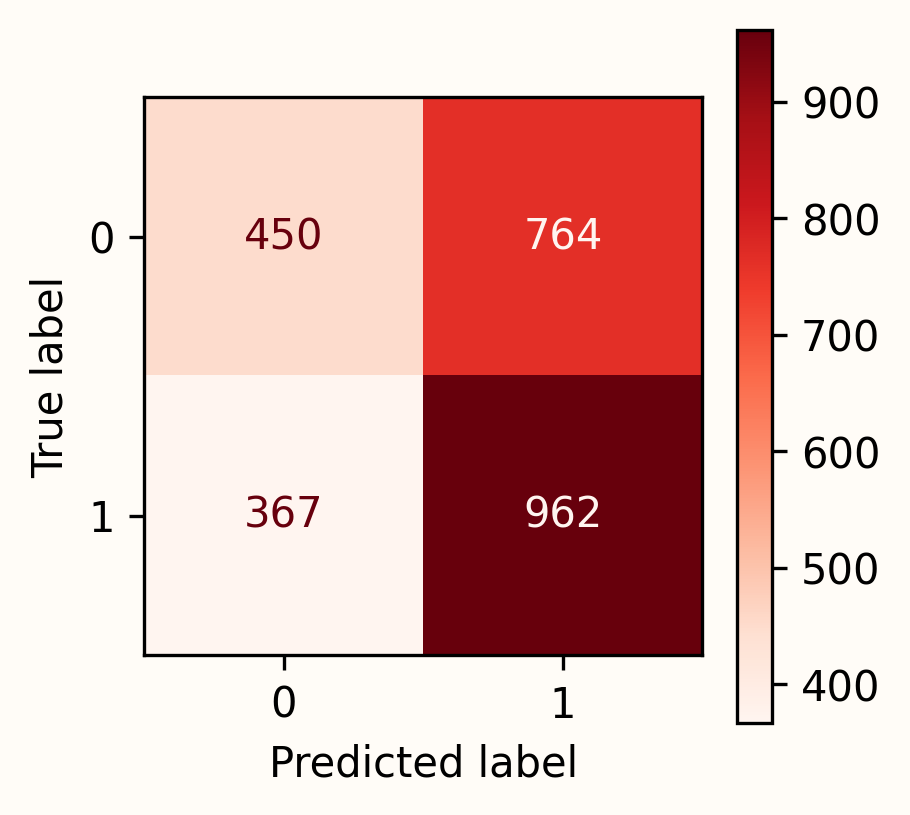

In [25]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=classification.classes_)
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTrain.png")

## Confusion Matrix Test Set

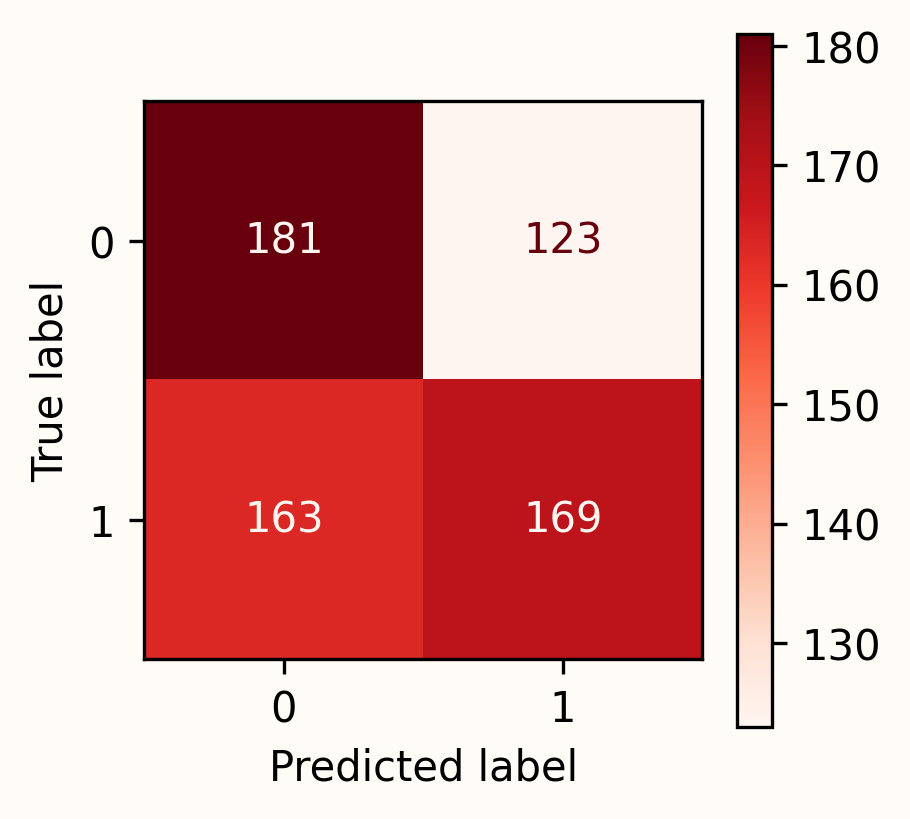

In [26]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=classification.classes_)
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTest.png")

## Confusion Matrix Validation Set

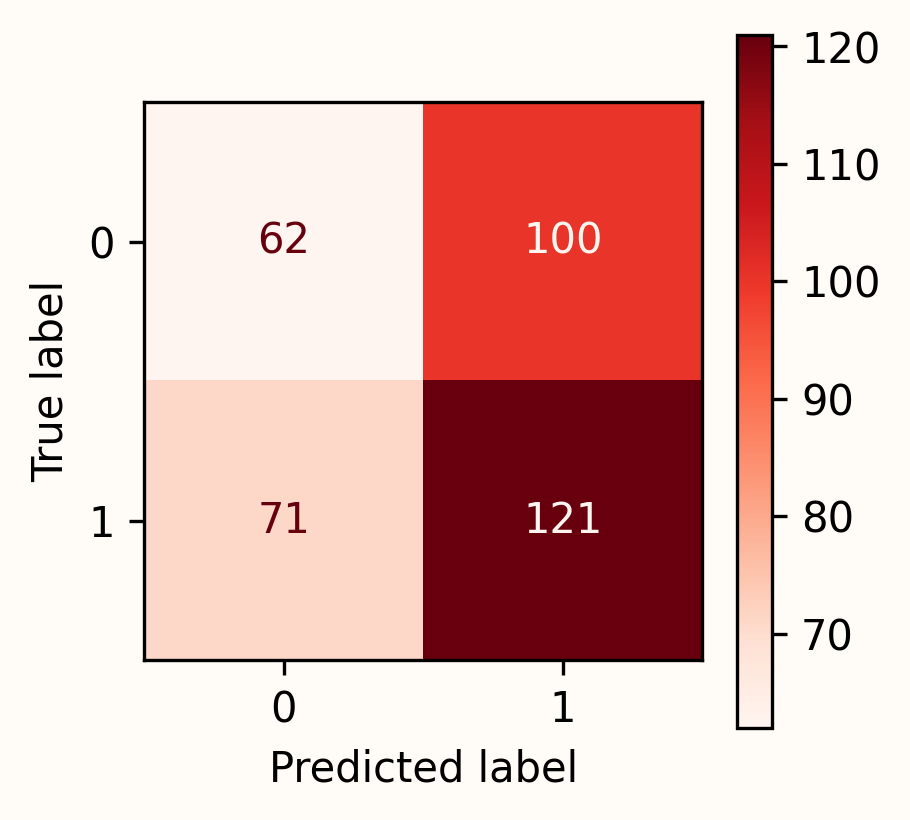

In [27]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_val = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(cm_val, display_labels=classification.classes_)
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixValidation.png")

## Error Matrix

In [28]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [29]:
error_metric

,Train,Test,Val
accuracy,0.555250,0.550314,0.516949
F1,0.629787,0.541667,0.585956
recall,0.723853,0.509036,0.630208
precission,0.557358,0.578767,0.547511
kappa,0.095885,0.103855,0.013108


In [30]:
name = classification.feature_names_in_.tolist()
#name

In [31]:
coef = classification.coef_.tolist()[0]
coef = np.abs(coef)

In [32]:
pd.DataFrame({'name':name,'abs_coef':coef}).sort_values('abs_coef', ascending=False).head(10)

,name,abs_coef
29,STOCHd_14_3_3,1.021770
21,BBB_7_2.0,0.777073
10,rsi_3,0.697648
26,BBB_14_2.0,0.667527
34,cmf_7,0.654896
22,BBP_7_2.0,0.552376
0,volume,0.527179
30,atr_3,0.518408
28,STOCHk_14_3_3,0.484083
17,BBP_3_2.0,0.361236


# Export

In [33]:
today = date.today()
model_name = 'logistic_regression'
description = 'with_feature_selection'

In [34]:
error_metric.to_csv('../data/results/error_metric_{}_{}_{}.csv'.format(model_name,description,today))